In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sbn
from sklearn.linear_model import LinearRegression

df = pd.read_csv('imdb_top_1000.csv')
df.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [6]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [7]:
Df=df.drop(["Poster_Link","Certificate","Meta_score","Gross"],axis=1)
Df.head(3)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232


In [8]:
Df.columns

Index(['Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating',
       'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4',
       'No_of_Votes'],
      dtype='object')

In [9]:
satir_sayisi = df.shape[0]
sutun_sayisi = df.shape[1]

print("Satır sayısı:", satir_sayisi)
print("Sütun sayısı:", sutun_sayisi)

Satır sayısı: 1000
Sütun sayısı: 16


In [10]:
most = Df.query('IMDB_Rating > 7', inplace = False).sort_values('IMDB_Rating', ascending = False)
most[:10]

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845
5,The Lord of the Rings: The Return of the King,2003,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758
6,Pulp Fiction,1994,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188
7,Schindler's List,1993,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505
10,The Lord of the Rings: The Fellowship of the Ring,2001,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481
11,Forrest Gump,1994,142 min,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the e...",Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221


In [11]:
least = Df.sort_values("IMDB_Rating", ascending=True).head(10)
least

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes
999,The 39 Steps,1935,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853
908,Kick-Ass,2010,117 min,"Action, Comedy, Crime",7.6,Dave Lizewski is an unnoticed high school stud...,Matthew Vaughn,Aaron Taylor-Johnson,Nicolas Cage,Chloë Grace Moretz,Garrett M. Brown,524081
909,Celda 211,2009,113 min,"Action, Adventure, Crime",7.6,The story of two men on different sides of a p...,Daniel Monzón,Luis Tosar,Alberto Ammann,Antonio Resines,Manuel Morón,63882
910,Moneyball,2011,133 min,"Biography, Drama, Sport",7.6,Oakland A's general manager Billy Beane's succ...,Bennett Miller,Brad Pitt,Robin Wright,Jonah Hill,Philip Seymour Hoffman,369529
911,La piel que habito,2011,120 min,"Drama, Horror, Thriller",7.6,"A brilliant plastic surgeon, haunted by past t...",Pedro Almodóvar,Antonio Banderas,Elena Anaya,Jan Cornet,Marisa Paredes,138959
912,Zombieland,2009,88 min,"Adventure, Comedy, Fantasy",7.6,A shy student trying to reach his family in Oh...,Ruben Fleischer,Jesse Eisenberg,Emma Stone,Woody Harrelson,Abigail Breslin,520041
913,Die Welle,2008,107 min,"Drama, Thriller",7.6,A high school teacher's experiment to demonstr...,Dennis Gansel,Jürgen Vogel,Frederick Lau,Max Riemelt,Jennifer Ulrich,102742
914,Sherlock Holmes,2009,128 min,"Action, Adventure, Mystery",7.6,Detective Sherlock Holmes and his stalwart par...,Guy Ritchie,Robert Downey Jr.,Jude Law,Rachel McAdams,Mark Strong,583158
915,The Blind Side,2009,129 min,"Biography, Drama, Sport",7.6,"The story of Michael Oher, a homeless and trau...",John Lee Hancock,Quinton Aaron,Sandra Bullock,Tim McGraw,Jae Head,293266
916,The Visitor,2007,104 min,Drama,7.6,A college professor travels to New York City t...,Tom McCarthy,Richard Jenkins,Haaz Sleiman,Danai Gurira,Hiam Abbass,41544


 "Genre" sütununda bulunan 18. satırın değeri

In [12]:
Df[["Genre"]].iloc[18]

Genre    Biography, Drama, History
Name: 18, dtype: object

Sıralı Yıl

In [13]:

newDF = Df.sort_values(by="Released_Year")
newDF["Released_Year"] = newDF["Released_Year"].astype(int)
# 2. Süreyi Integer'a Dönüştürme:
newDF["Runtime"] = newDF["Runtime"].str.replace(" min", "").astype(int)
# 3. Yeni Veri Setini Kaydetme (CSV olarak):
newDF.to_csv("düzenlenmiş_V.csv", index=False)

In [14]:
apollo_13_row = newDF[newDF["Series_Title"] == "Apollo 13"]
apollo_13_runtime = apollo_13_row["Runtime"].iloc[0]

print("Apollo 13 filmi süresi:", apollo_13_runtime, "dakika")

Apollo 13 filmi süresi: 140 dakika


In [15]:
newDF.describe()

,Released_Year,Runtime,IMDB_Rating,No_of_Votes
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1991.221000,122.891000,7.949300,2.736929e+05
std,23.285669,28.093671,0.275491,3.273727e+05
min,1920.000000,45.000000,7.600000,2.508800e+04
25%,1976.000000,103.000000,7.700000,5.552625e+04
50%,1999.000000,119.000000,7.900000,1.385485e+05
75%,2009.000000,137.000000,8.100000,3.741612e+05
max,2020.000000,321.000000,9.300000,2.343110e+06


In [16]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 321 to 612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int32  
 2   Runtime        1000 non-null   int32  
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Overview       1000 non-null   object 
 6   Director       1000 non-null   object 
 7   Star1          1000 non-null   object 
 8   Star2          1000 non-null   object 
 9   Star3          1000 non-null   object 
 10  Star4          1000 non-null   object 
 11  No_of_Votes    1000 non-null   int64  
dtypes: float64(1), int32(2), int64(1), object(8)
memory usage: 93.8+ KB


1920 den beri Yıllık film sayısı

(array([1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

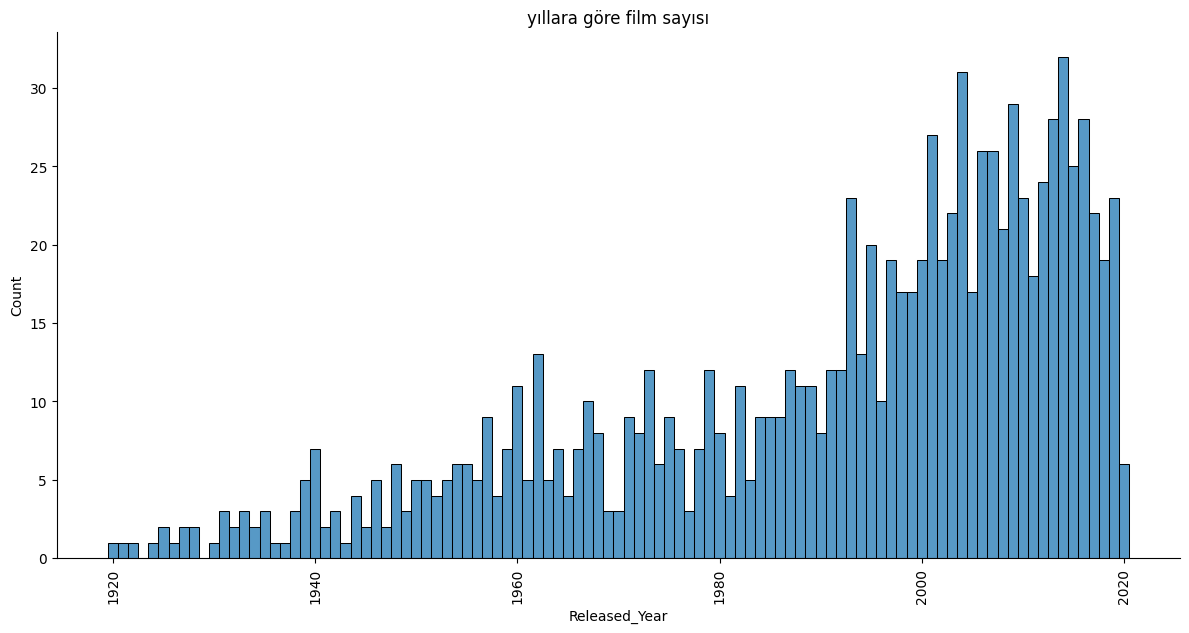

In [17]:
sbn.displot(newDF["Released_Year"], discrete=True, aspect=2, height=6, kind='hist').set(title='yıllara göre film sayısı')
plt.xticks(rotation=90)

Yıllara göre oy sayısındaki değişim

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 [Text(0, 0, '1920'),
  Text(1, 0, '1921'),
  Text(2, 0, '1922'),
  Text(3, 0, '1924'),
  Text(4, 0, '1925'),
  Text(5, 0, '1926'),
  Text(6, 0, '1927'),
  Text(7, 0, '1928'),
  Text(8, 0, '1930'),
  Text(9, 0, '1931'),
  Text(10, 0, '1932'),
  Text(11, 0, '1933'),
  Text(12, 0, '1934'),
  Text(13, 0, '1935'),
  Text(14, 0, '1936'),
  Text(15, 0, '1937'),
  Text(16, 0, '1938'),
  Text(17, 0, '1939'),
  Text(18, 0, '1940'),
  Text(19, 0, '1941'),
  Text(20, 0, '1942'),
  Text(21, 0, '1943'),
  Text(22, 0, '1944'),
  Text(23, 0, '1945'),
  Text(24, 0

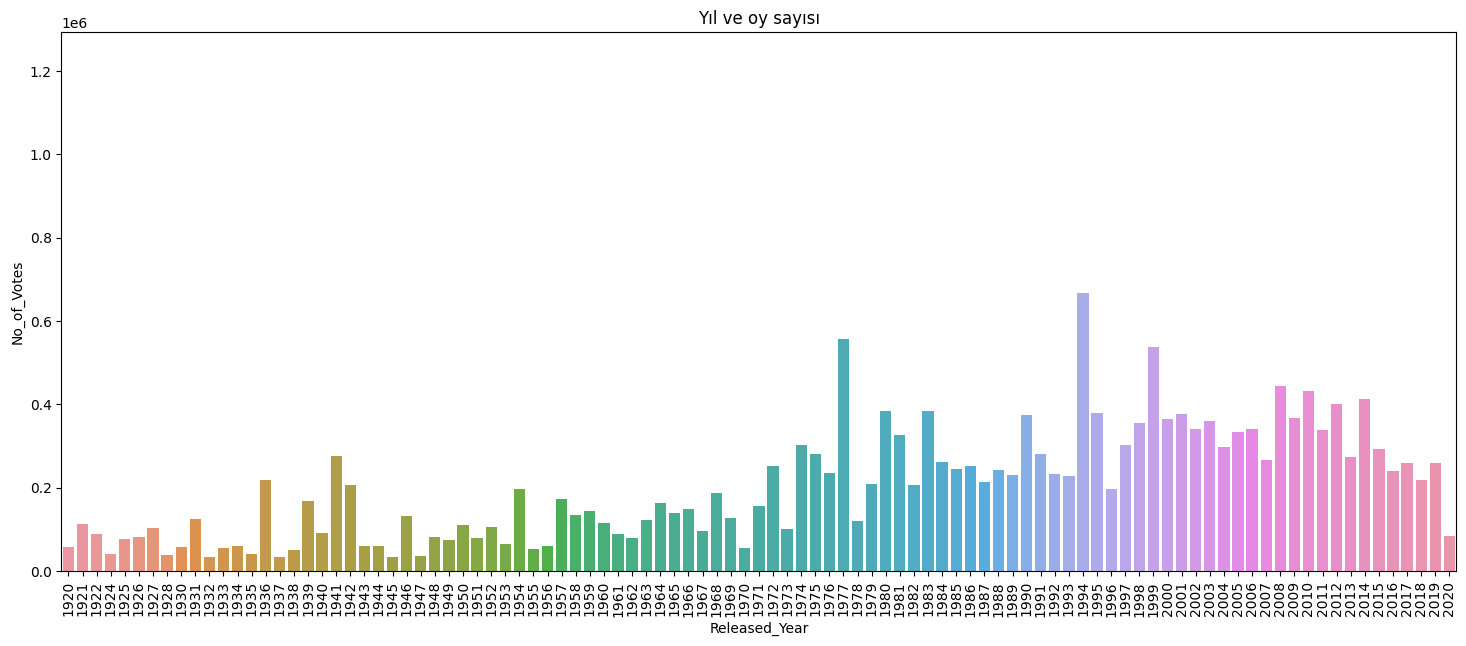

In [18]:
newDF_mr = newDF.No_of_Votes
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sbn.barplot(x ="Released_Year", y = "No_of_Votes",data=newDF ,ax = ax, errwidth = False).set(title='Yıl ve oy sayısı')
plt.xticks(rotation=90)

In [19]:
newDF["IMDB_Rating"] = newDF["IMDB_Rating"].astype(int)

In [20]:
# "PG" değerini "N/A" (veya başka bir kategori) olarak değiştirin
newDF["Released_Year"] = newDF["Released_Year"].replace("PG", "N/A")

print(newDF.dtypes)

Series_Title     object
Released_Year     int32
Runtime           int32
Genre            object
IMDB_Rating       int32
Overview         object
Director         object
Star1            object
Star2            object
Star3            object
Star4            object
No_of_Votes       int64
dtype: object


In [21]:
for column in df.columns:
    is_numeric = pd.to_numeric(df[column], errors="coerce").notnull().all()
    print(f"{column} sütunu numeric: {is_numeric}")

Poster_Link sütunu numeric: False
Series_Title sütunu numeric: False
Released_Year sütunu numeric: True
Certificate sütunu numeric: False
Runtime sütunu numeric: False
Genre sütunu numeric: False
IMDB_Rating sütunu numeric: True
Overview sütunu numeric: False
Meta_score sütunu numeric: False
Director sütunu numeric: False
Star1 sütunu numeric: False
Star2 sütunu numeric: False
Star3 sütunu numeric: False
Star4 sütunu numeric: False
No_of_Votes sütunu numeric: True
Gross sütunu numeric: False


Film Özellikleri Veri Kümesi Analizi

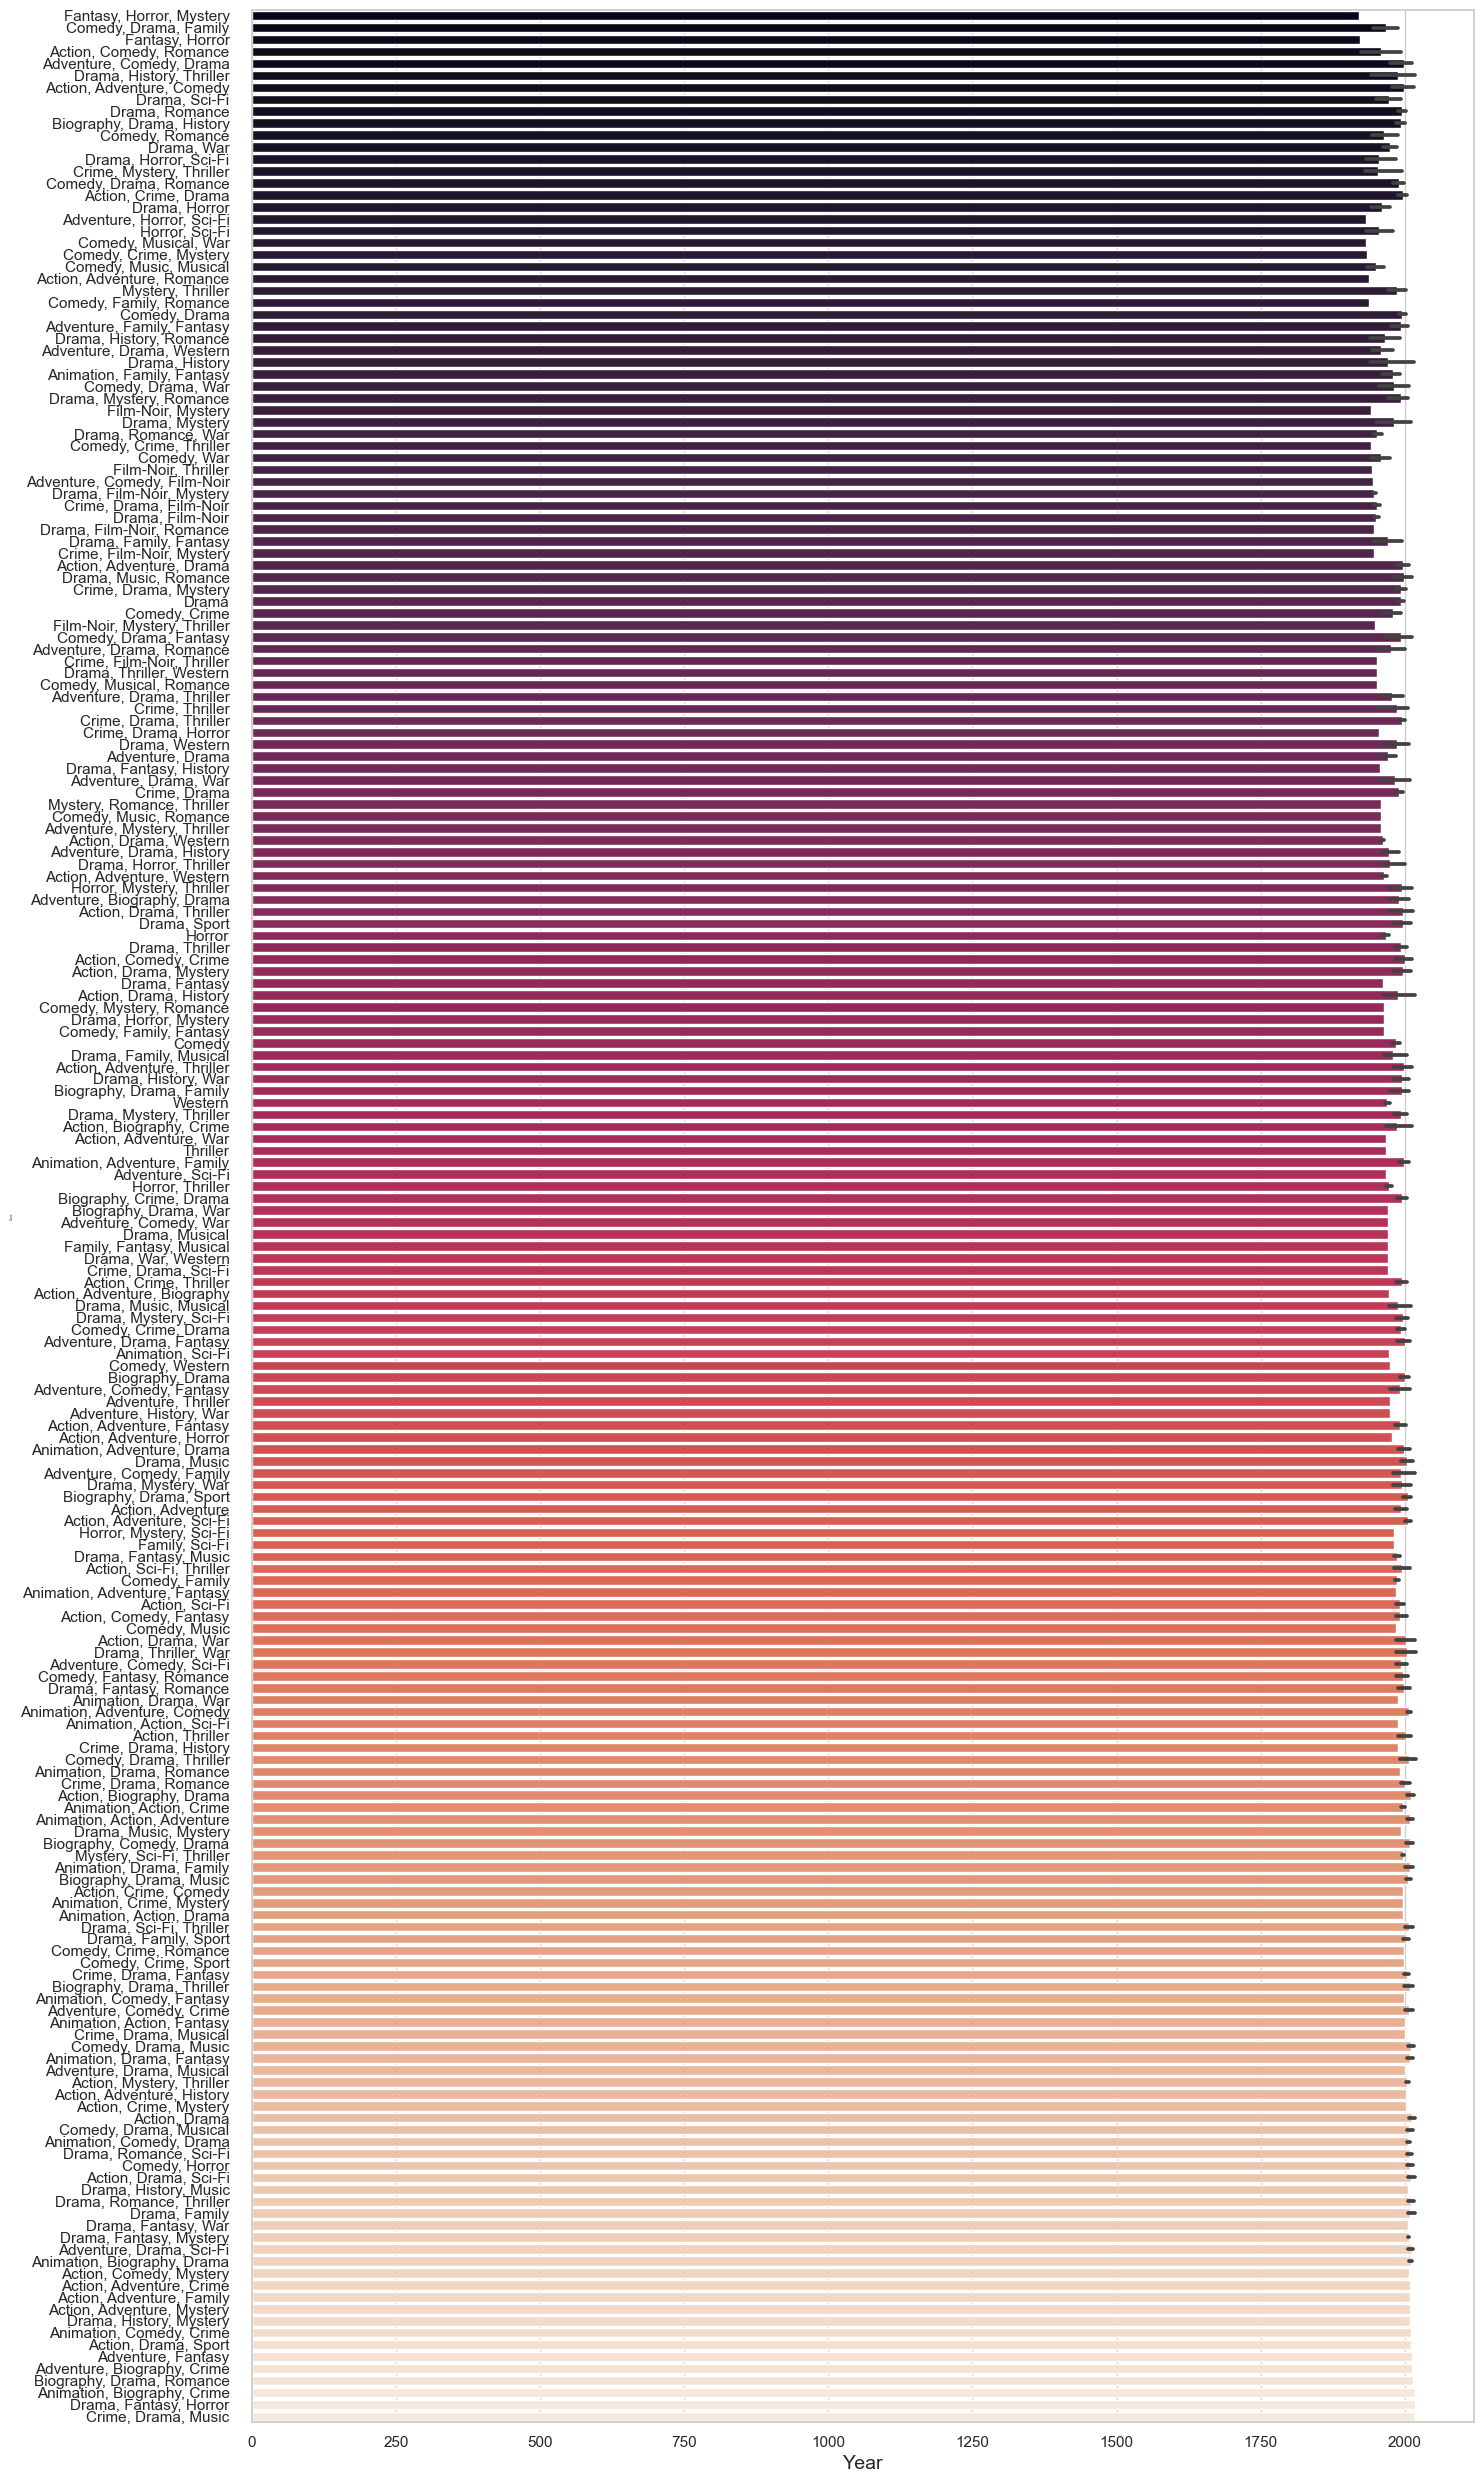

In [22]:
sbn.set(style="whitegrid")
plt.figure(figsize=(15, 25))
ax = sbn.barplot(y='Genre', x='Released_Year', data=newDF, palette='rocket')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Genre', fontsize=2)


ax.tick_params(axis='y', which='major', pad=10)  

plt.tight_layout() 
plt.show()

En çok IMDB_Rating Göre En İyi 10 Tür

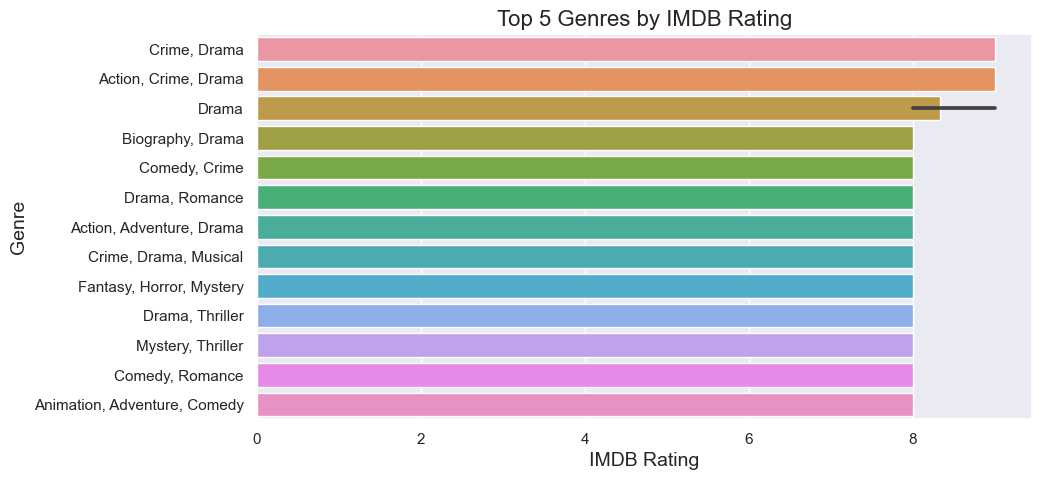

In [23]:
sbn.set_style(style='darkgrid')
plt.figure(figsize=(10, 5))

top_5_genres = newDF.sort_values('IMDB_Rating', ascending=False).head(17)


sbn.barplot(y='Genre', x='IMDB_Rating', data=top_5_genres)
plt.xlabel('IMDB Rating', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Top 5 Genres by IMDB Rating', fontsize=16)

plt.show()

IMDb puanları 8.0 ve üstü olan filmlerin "Star1" verisini bulmak

In [24]:
df = pd.DataFrame(newDF)


high_imdb_movies = df[df["IMDB_Rating"] >= 8.0]


high_imdb_star1 = high_imdb_movies["Star1"]

print(high_imdb_star1)

321            Werner Krauss
127          Charles Chaplin
194            Buster Keaton
193          Charles Chaplin
462        Aleksandr Antonov
               ...          
135    Carlos Martínez López
84      Dean-Charles Chapman
18        Lin-Manuel Miranda
20                    Suriya
205              Kemp Powers
Name: Star1, Length: 463, dtype: object


IMDb puanı 8.0 ve üstü olan filmlerde yer alan "Star1" isimlerinin sayısı gösterir

In [25]:
high_imdb_movies = newDF[newDF["IMDB_Rating"] >= 8.0]


high_imdb_star1 = high_imdb_movies["Star1"]


star1_counts = high_imdb_star1.value_counts()

print(star1_counts)

Star1
Toshirô Mifune       7
Leonardo DiCaprio    7
Aamir Khan           7
James Stewart        7
Robert De Niro       6
                    ..
John Musker          1
Leslie Cheung        1
Bill Murray          1
Damian Chapa         1
Kemp Powers          1
Name: count, Length: 332, dtype: int64


In [26]:
yil_sayilari = df['Released_Year'].value_counts()


en_cok_film_yil = yil_sayilari.idxmax()
en_cok_film_sayisi = yil_sayilari.max()

print("En çok vizyona giren film yılı:", en_cok_film_yil)
print("Bu yılda vizyona giren film sayısı:", en_cok_film_sayisi)

En çok vizyona giren film yılı: 2014
Bu yılda vizyona giren film sayısı: 32


In [27]:
films_2014 = df[df['Released_Year'] == 2014]

films_2014_sorted = films_2014.sort_values(by='IMDB_Rating', ascending=False)


top_3_films_2014 = films_2014_sorted.head(3)

print("2014 yılında IMDb puanı en yüksek olan 3 film:")
print(top_3_films_2014[['Series_Title', 'IMDB_Rating']])

2014 yılında IMDb puanı en yüksek olan 3 film:
         Series_Title  IMDB_Rating
200             Mommy            8
201            Haider            8
204  Relatos salvajes            8


In [28]:
genre_votes_sum = df.groupby('Genre')['No_of_Votes'].sum()


top_4_genres = genre_votes_sum.sort_values(ascending=False).head(4)

print("En çok oy verilen 4 film türü:")
print(top_4_genres)

En çok oy verilen 4 film türü:
Genre
Drama                           17720455
Action, Adventure, Sci-Fi       14635798
Crime, Drama                    10655273
Animation, Adventure, Comedy     9894322
Name: No_of_Votes, dtype: int64


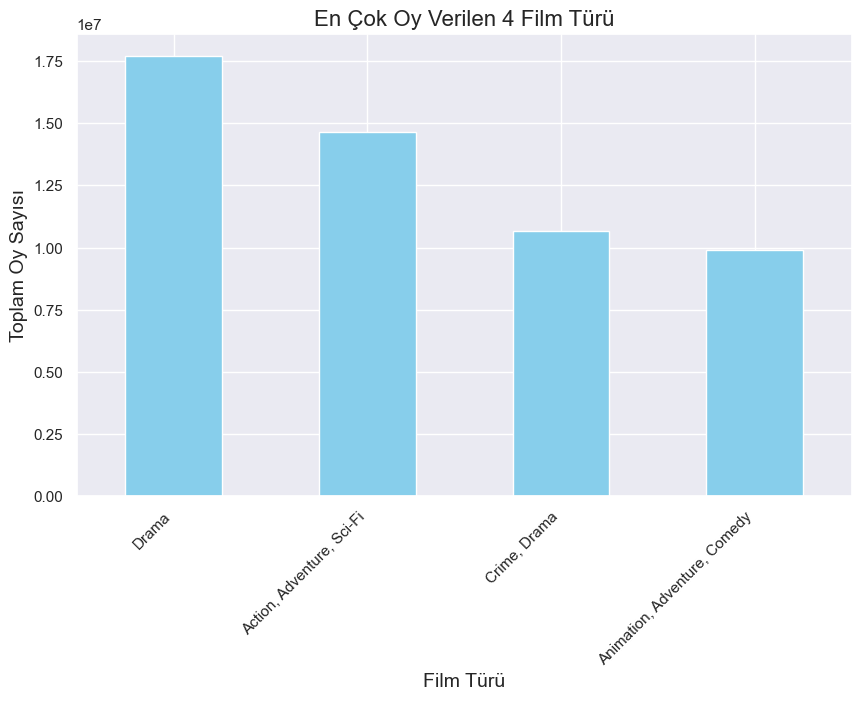

In [29]:
plt.figure(figsize=(10, 6))
top_4_genres.plot(kind='bar', color='skyblue')
plt.xlabel('Film Türü', fontsize=14)
plt.ylabel('Toplam Oy Sayısı', fontsize=14)
plt.title('En Çok Oy Verilen 4 Film Türü', fontsize=16)
plt.xticks(rotation=45, ha='right')

plt.show()




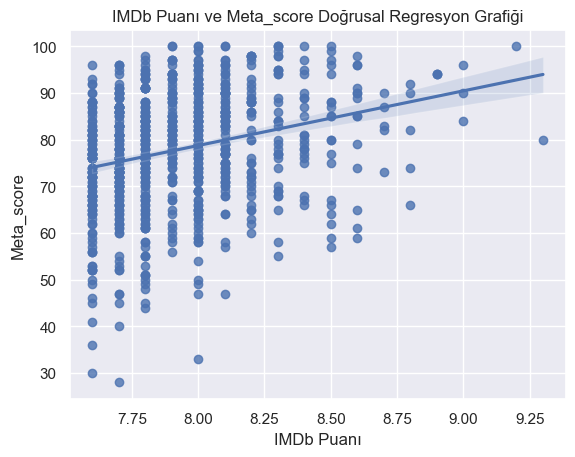

IMDb Puanı ile Meta_score arasındaki korelasyon: 0.26853084455955506


In [ ]:
df = pd.DataFrame(df)


correlation = df["IMDB_Rating"].corr(df["Meta_score"])

sbn.regplot(x=df["IMDB_Rating"], y=df["Meta_score"], scatter=True)
plt.xlabel("IMDb Puanı")
plt.ylabel("Meta_score")
plt.title("IMDb Puanı ve Meta_score Doğrusal Regresyon Grafiği")
plt.grid(True)
plt.show()

print("IMDb Puanı ile Meta_score arasındaki korelasyon:", correlation)

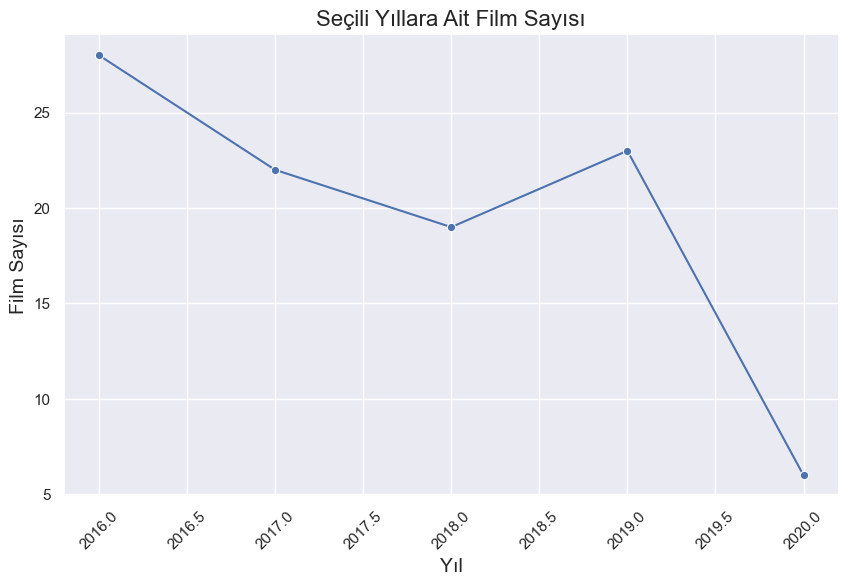

In [ ]:
years = [2020, 2019, 2018, 2017, 2016]
df_selected_years = df[df['Released_Year'].isin(years)]


film_counts_by_year = df_selected_years['Released_Year'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
sbn.lineplot(x=film_counts_by_year.index, y=film_counts_by_year.values, marker='o')
plt.xlabel('Yıl', fontsize=14)
plt.ylabel('Film Sayısı', fontsize=14)
plt.title('Seçili Yıllara Ait Film Sayısı', fontsize=16)
plt.xticks(rotation=45)

plt.show()

Pozitif değer olması, IMDb Puanı ve Meta_score arasında doğrusal bir ilişkinin olduğunu gösterir.
Ancak, 0'a yakın olması, bu ilişkinin çok zayıf olduğunu gösterir.

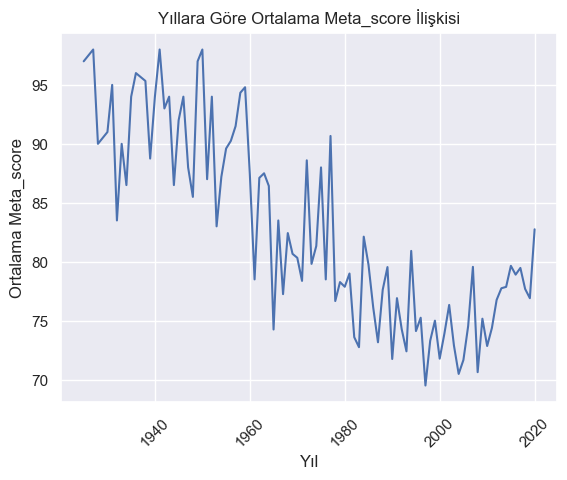

In [ ]:
df_year_score = df[["Released_Year", "Meta_score"]]

avg_meta_score_by_year = df_year_score.groupby("Released_Year")["Meta_score"].mean().reset_index()


sbn.lineplot(data=avg_meta_score_by_year, x="Released_Year", y="Meta_score")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Meta_score")
plt.title("Yıllara Göre Ortalama Meta_score İlişkisi")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df = pd.DataFrame(newDF)
df_long_films = df[df["Runtime"] > 180]

# 120 dakikadan uzun olan filmlerin sayısını göster
num_long_films = len(df_long_films)
print("120 dakikadan uzun filmlerin sayısı:", num_long_films)

# 120 dakikadan uzun olan filmleri listele
print(df_long_films)

120 dakikadan uzun filmlerin sayısı: 40
                                      Series_Title  Released_Year  Runtime   
314                             Gone with the Wind           1939      238  \
31                            Shichinin no samurai           1954      207   
996                                          Giant           1956      201   
552                           The Ten Commandments           1956      220   
300                                        Ben-Hur           1959      212   
549                                      Spartacus           1960      197   
116                             Lawrence of Arabia           1962      228   
430                                 Doctor Zhivago           1965      197   
290                                  Andrei Rublev           1966      205   
422                            Fiddler on the Roof           1971      181   
3                           The Godfather: Part II           1974      202   
177                     

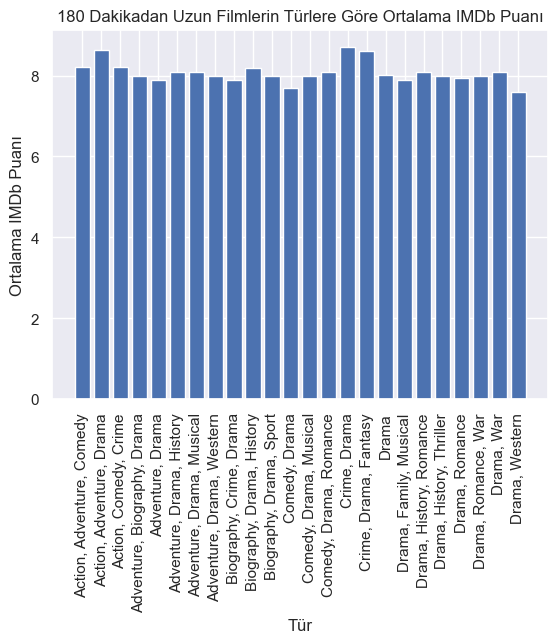

In [ ]:
df = pd.DataFrame(newDF)

# "Runtime" sütununda 120 dakikadan uzun olan filmleri filtrele
df_long_films = df[df["Runtime"] > 180]

# Her türün IMDb puanlarının ortalama değerlerini bul
genre_ratings = df_long_films.groupby("Genre")["IMDB_Rating"].mean()

# Çubuk grafik oluştur
plt.bar(genre_ratings.index, genre_ratings.values)
plt.xlabel("Tür")
plt.ylabel("Ortalama IMDb Puanı")
plt.title("180 Dakikadan Uzun Filmlerin Türlere Göre Ortalama IMDb Puanı")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = pd.DataFrame(newDF)


son_10_konu = df["Overview"][-10:]

print("Son 10 filmin konuları:")
for i, konu in enumerate(son_10_konu, 1):
    print(f"{i}. Film: {konu}")

Son 10 filmin konuları:
1. Film: In Gotham City, mentally troubled comedian Arthur Fleck is disregarded and mistreated by society. He then embarks on a downward spiral of revolution and bloody crime. This path brings him face-to-face with his alter-ego: the Joker.
2. Film: An old man recalls his time painting houses for his friend, Jimmy Hoffa, through the 1950-70s.
3. Film: A simple act of kindness always sparks another, even in a frozen, faraway place. When Smeerensburg's new postman, Jesper, befriends toymaker Klaus, their gifts melt an age-old feud and deliver a sleigh full of holiday traditions.
4. Film: April 6th, 1917. As a regiment assembles to wage war deep in enemy territory, two soldiers are assigned to race against time and deliver a message that will stop 1,600 men from walking straight into a deadly trap.
5. Film: The real life of one of America's foremost founding fathers and first Secretary of the Treasury, Alexander Hamilton. Captured live on Broadway from the Richard 

In [ ]:
son_10_turler = newDF["Genre"][-10:]

print("Son 10 filmin türleri:")
for i, tur in enumerate(son_10_turler, 1):
    print(f"{i}. Film: {tur}")

Son 10 filmin türleri:
1. Film: Crime, Drama, Thriller
2. Film: Biography, Crime, Drama
3. Film: Animation, Adventure, Comedy
4. Film: Drama, Thriller, War
5. Film: Biography, Drama, History
6. Film: Drama
7. Film: Animation, Adventure, Comedy
8. Film: Comedy, Drama
9. Film: Comedy, Drama, Romance
10. Film: Drama, History, Thriller


In [ ]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
son_3_konu = df["Overview"][-3:]


vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["Overview"])


son_3_konu_tfidf = vectorizer.transform(son_3_konu)


jaccard_similarities = linear_kernel(son_3_konu_tfidf, tfidf_matrix)


similarities_dict = {}
for i, film in enumerate(df["Series_Title"]):
    similarities_dict[film] = jaccard_similarities[:, i]
    

print("Son 3 filmin diğer filmlerle olan benzerlikleri:")
for i, konu in enumerate(son_3_konu, 1):
    print(f"{i}. Film: {konu}")
    print("Benzerlik Skorları:")    
    for film, similarity in sorted(similarities_dict.items(), key=lambda x: x[1][i-1], reverse=True)[:3]:
        print(f"{film}: {similarity[i-1]}")
    print("\n")
    

Son 3 filmin diğer filmlerle olan benzerlikleri:
1. Film: Four friends, all high school teachers, test a theory that they will improve their lives by maintaining a constant level of alcohol in their blood.
Benzerlik Skorları:
Druk: 1.0000000000000002
Dazed and Confused: 0.1747819220828652
Hera Pheri: 0.15568953001781904


2. Film: The emotional journey of two hopelessly in love youngsters, a young girl, Kizie, suffering from cancer, and a boy, Manny, whom she meets at a support group.
Benzerlik Skorları:
Dil Bechara: 1.0000000000000002
The Fault in Our Stars: 0.1472557686617662
Dogville: 0.12586230910378798


3. Film: The story of 7 people on trial stemming from various charges surrounding the uprising at the 1968 Democratic National Convention in Chicago, Illinois.
Benzerlik Skorları:
The Trial of the Chicago 7: 1.0000000000000004
La passion de Jeanne d'Arc: 0.13937822248758394
Waking Life: 0.13886074838189721




1.Film-"Druk" (ingilizce adı: "Another Round") filmi ile tam benzerlik gösteriyor. Bu, iki film arasında içerik ve temas açısından yüksek bir benzerlik olduğunu gösterir. Bu benzerlik, belki de benzer konuları ele almalarından kaynaklanıyor olabilir.

2.Film-"Dil Bechara" filmi ile tam benzerlik gösteriyor. Bu da yine yüksek bir benzerlik olduğunu gösterir. İki film arasında duygusal ve dramatik unsurların benzer olduğunu söyleyebiliriz.


3.Film-"The Trial of the Chicago 7" filmi ile tam benzerlik gösteriyor. Bu da yüksek benzerlik olduğunu gösterir. Bu filmler arasındaki benzerlik, tarihsel olayları ve hukuki süreçleri ele alıyor olmalarından kaynaklanıyor olabilir.


Genel olarak, benzerlik skorları yüksek olan filmlar arasında genellikle konu, tema veya tür açısından benzerlikler bulunmaktadır. Yüksek benzerlik skorları, izleyicilere belirli bir filmi beğenmişlerse benzer konuda veya temada diğer filmleri de beğenebileceklerini gösterebilir.

In [ ]:
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[0]

array([1.        , 0.        , 0.        , 0.01021691, 0.00797501,
       0.        , 0.        , 0.00377665, 0.00499411, 0.00841473,
       0.        , 0.        , 0.09851295, 0.00654317, 0.00907631,
       0.00543788, 0.00485761, 0.01191147, 0.        , 0.        ,
       0.        , 0.        , 0.0780536 , 0.        , 0.01240765,
       0.00726564, 0.00475933, 0.        , 0.00545097, 0.00465057,
       0.        , 0.01099062, 0.00502972, 0.        , 0.        ,
       0.00566094, 0.        , 0.00925936, 0.00495748, 0.        ,
       0.0820791 , 0.00502861, 0.        , 0.00501494, 0.00970355,
       0.00387907, 0.00547898, 0.00967953, 0.00479613, 0.        ,
       0.        , 0.        , 0.        , 0.00689439, 0.01140523,
       0.00587101, 0.00485449, 0.01639437, 0.        , 0.00837006,
       0.00967508, 0.00437007, 0.00624233, 0.005259  , 0.0112097 ,
       0.00667149, 0.        , 0.00456617, 0.        , 0.00992954,
       0.00814272, 0.00527613, 0.00651055, 0.        , 0.     